In [1]:
import pandas as pd
data = pd.read_csv('../data/bank-additional-full.csv', sep=';')

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
print(data.describe())
print(data.isnull().sum())
print(data['y'].value_counts(normalize=True))

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

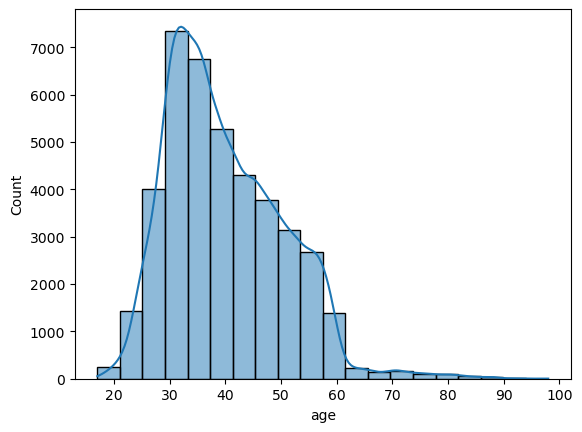

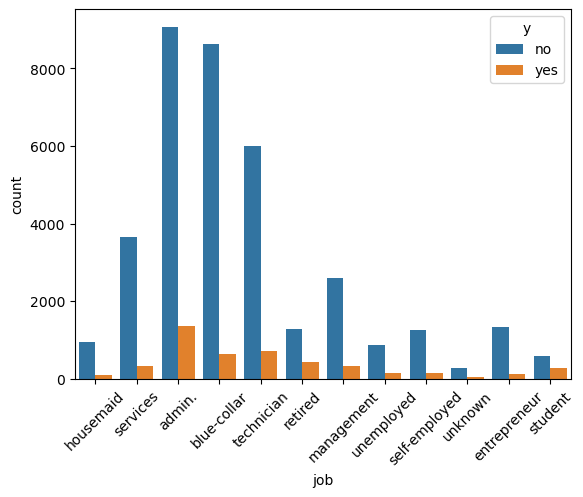

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['age'], bins=20, kde=True)
plt.show()

sns.countplot(x='job', hue='y', data=data)
plt.xticks(rotation=45)
plt.show()

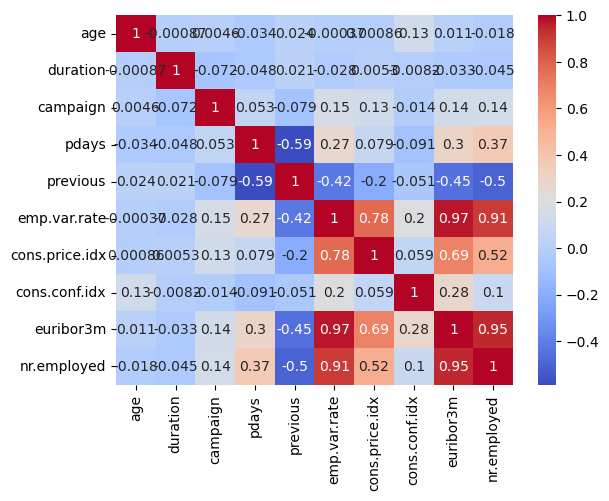

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [6]:
from sklearn.preprocessing import OneHotEncoder

cat_features = data.select_dtypes(include='object').drop(columns=['y']).columns
data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
data_encoded[num_features] = scaler.fit_transform(data_encoded[num_features])

In [8]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['y'])
y = data_encoded['y'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\JOEKONA\Anaconda33\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
importances = grid.best_estimator_.feature_importances_
feature_names = X_train.columns
sorted_indices = importances.argsort()

plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.show()